#                          Project Movies Analysis

## Project overview

For this project, you will use exploratory data analysis to generate insights for a business stakeholder.



## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



## Objectives

1. Importing the required libraries

2. Loading Data from the files

3. Data understanding by analysing the data

4. Data Cleaning and handling of NAN values in the datasets

5. Data Visualisation 

## Sources of My Datasets

1. imdb.title.basics

2. imdb.title.ratings

3. bom.movie_gross

## Importing Libraries

Importing and alias Pandas as pd

Import and alias matplotlib.pyplot as plt


Import and alias seaborn as sns


Set Matplotlib visualizations to display inline in the notebook


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Understanding

### Loading Data

In [2]:
bom_df = pd.read_csv("bom.movie_gross.csv",index_col=0)

In [3]:
bom_df.head(5)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


Looking at the info printout

In [4]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [5]:
bom_df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
Title_df = pd.read_csv("imdb.title.basics.csv", index_col=0)

In [7]:
Title_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
Title_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [9]:
Title_df.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
Ratings_df = pd.read_csv("imdb.title.ratings.csv.gz",index_col=0)

In [11]:
Ratings_df.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [12]:
Ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [13]:
Ratings_df.isna().sum()

averagerating    0
numvotes         0
dtype: int64

## Data Cleaning

### Identifying and Handling Missing Values

In [14]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [15]:
bom_df.dtypes

studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [16]:
# Removing the comma in currency 
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',','')

In [17]:
#Converting the foreign gross from object to float to allow calculations
bom_df = bom_df.astype({'foreign_gross':float})

In [18]:
bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median(), inplace=True)

bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].median(), inplace=True)

bom_df['studio'].fillna('Missing', inplace=True)

In [19]:
#creating a new column WorldWide_gross for the summation of Domestic and Foreign gross
bom_df['WorldWide_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

In [20]:
#Making sure there are no NAN values after the cleaning
bom_df.isna().sum()

studio             0
domestic_gross     0
foreign_gross      0
year               0
WorldWide_gross    0
dtype: int64

In [21]:
"""
Dealing with the numerical data by replacing the NAN values with their median value and for the categorical data replacing the NAN values with a descriptive word 'Missing'
"""

"\nDealing with the numerical data by replacing the NAN values with their median value and for the categorical data replacing the NAN values with a descriptive word 'Missing'\n"

In [22]:
Title_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [23]:
Title_df.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [24]:
Title_df['original_title'].fillna('Missing',inplace=True)

Title_df['runtime_minutes'].fillna(Title_df['runtime_minutes'].median(), inplace=True)

Title_df['genres'].fillna('Missing', inplace=True)

In [25]:
#Making sure there are no NAN values after the cleaning
Title_df.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [26]:
"""
Dealing with the numerical data by replacing the NAN values with their median value and for the categorical data replacing the NAN values with a descriptive word 'Missing'
"""

"\nDealing with the numerical data by replacing the NAN values with their median value and for the categorical data replacing the NAN values with a descriptive word 'Missing'\n"

In [27]:
Ratings_df.isna().sum()

averagerating    0
numvotes         0
dtype: int64

## Data Visualization

###  Question 1: What films are currently doing best at box office?

In [28]:
#Creating a function to group data by their mean 
def class_grouped_means(data,columns,items_to_group_by):
    grouped_data = data.groupby(items_to_group_by)[columns].mean()
    grouped_df = pd.DataFrame(grouped_data)
    grouped_data.reset_index( drop= False, inplace= True)

    return grouped_df

In [102]:
grouping = class_grouped_means(bom_df,['WorldWide_gross'],'title')
grouping_1 = grouping.sort_values(by=['WorldWide_gross'], ascending=False).head(10)
grouping_1.head()

,title,WorldWide_gross
1622,Marvel's The Avengers,1.518900e+09
274,Avengers: Age of Ultron,1.405400e+09
387,Black Panther,1.347000e+09
1065,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
2317,Star Wars: The Last Jedi,1.332600e+09


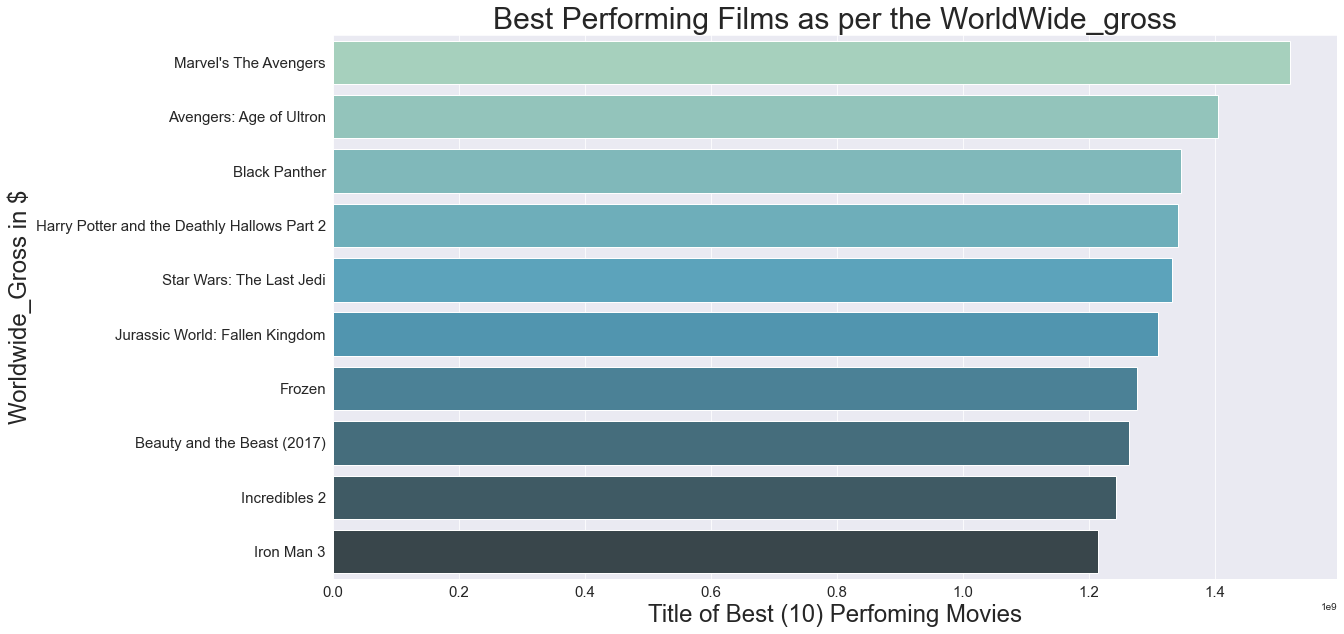

In [162]:
#Visualisation
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x = 'WorldWide_gross', y = 'title',data= grouping_1 ,palette='GnBu_d',orient='h')

ax.set_title('Best Performing Films as per the WorldWide_gross',fontsize= 30)
ax.set_xlabel('Title of Best (10) Perfoming Movies',fontsize= 24)
ax.set_ylabel('Worldwide_Gross in $',fontsize= 24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
bar.savefig("Title_VS_WorldWide_gross.png")



Analsis of the bar plot

In [31]:
"""
This shows the top 30 best performing movies currently at box office as per the WorldWide_Gross ($) they generated
"""

'\nThis shows the top 30 best performing movies currently at box office as per the WorldWide_Gross ($) they generated\n'

### Question 2: What Genres of films are currently doing best at box office?

In [32]:
#dropping the original_title column since it is not relevant to the analysis as we already have the primary_title column
Title_df.drop(columns='original_title',inplace=True)

In [33]:
#renaming the primary_title to title to make it easier to use the column for merging purposes
Title_df.rename(columns={'primary_title':'title'} ,inplace=True)

In [34]:
#merging the bom_df and Title_df on column title
Budget_Title_df = pd.merge(bom_df, Title_df, on='title')

In [35]:
#setting the index of Budget_Title_df to title
Budget_Title_df.set_index('title', inplace=True)

In [92]:
grouping_2 = class_grouped_means(Budget_Title_df,['WorldWide_gross'],'genres')
grouping_3 = grouping_2.sort_values(by=['WorldWide_gross'], ascending=False).head(10)
grouping_3.head()

,genres,WorldWide_gross
111,"Adventure,Drama,Sport",1.276400e+09
117,"Adventure,Fantasy",7.040333e+08
305,"Fantasy,Romance",6.590215e+08
110,"Adventure,Drama,Sci-Fi",6.537500e+08
13,"Action,Adventure,Sci-Fi",5.884001e+08


#### I : In terms of Worldwide Gross income

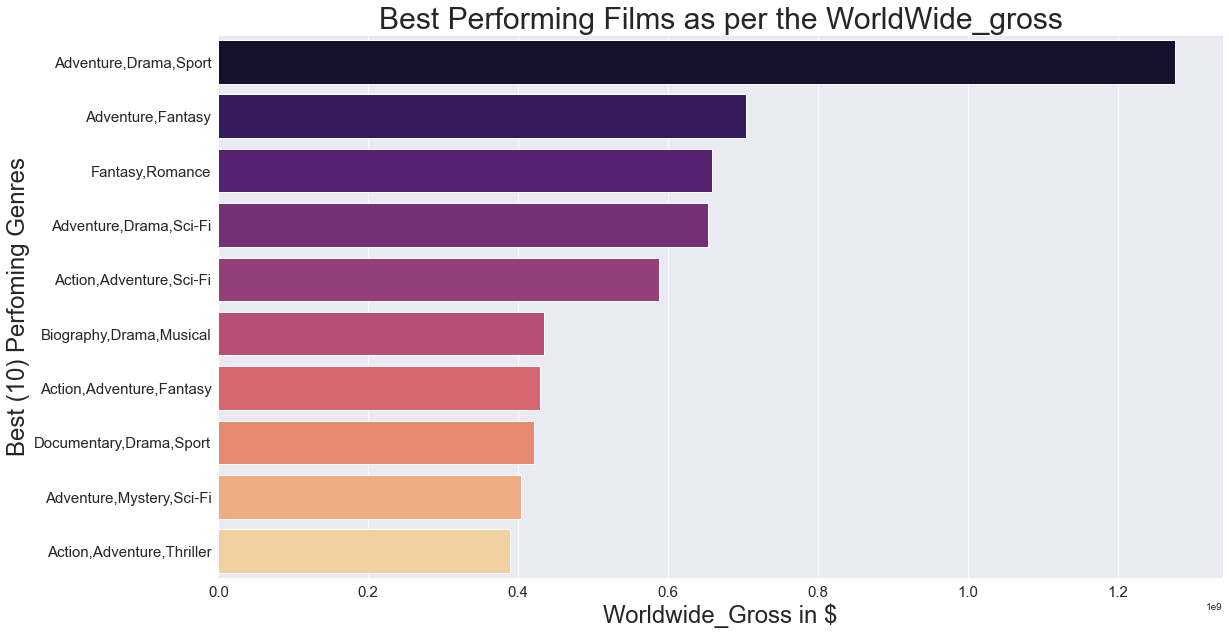

In [163]:
#Visualisation
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y = 'genres', x = 'WorldWide_gross',data= grouping_3 ,palette='magma', orient='h')

ax.set_title('Best Performing Films as per the WorldWide_gross',fontsize= 30)
ax.set_ylabel('Best (10) Perfoming Genres',fontsize= 24)
ax.set_xlabel('Worldwide_Gross in $',fontsize= 24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
bar.savefig("Genres_VS_WorldWide_gross.png")



Analysis of the visualisation

In [38]:
"""
Analysis of the top 30 performing genres in terms of the WorldWide_gross income they generated
"""

'\nAnalysis of the top 30 performing genres in terms of the WorldWide_gross income they generated\n'

In [39]:
#merging Title_df and Ratings_df on the column tconst
Title_Rating_df = pd.merge(Title_df, Ratings_df, on='tconst')

#### II : In terms of Ratings

In [40]:
budget_Title_Ratings_df = pd.merge(Budget_Title_df, Title_Rating_df ,on='title' )

In [41]:
budget_Title_Ratings_df.drop(columns=['start_year_x','runtime_minutes_x','genres_x'],inplace=True)

In [42]:
budget_Title_Ratings_df.rename(columns={'start_year_y':'start_year','runtime_minutes_y':'runtime_minutes','genres_y':'genres'},inplace=True)

In [43]:
budget_Title_Ratings_df.head()

,title,studio,domestic_gross,foreign_gross,year,WorldWide_gross,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [80]:
grouping_4 = class_grouped_means(budget_Title_Ratings_df,['averagerating'],'genres')
grouping_5 = grouping_4.sort_values(by=['averagerating'], ascending=False).head(10)
grouping_5.head()

,genres,averagerating
78,Adventure,9.20
173,"Comedy,Documentary,Drama",8.55
75,"Action,Sport",8.40
106,"Adventure,Drama,Sci-Fi",8.30
146,"Biography,Documentary,Family",8.30


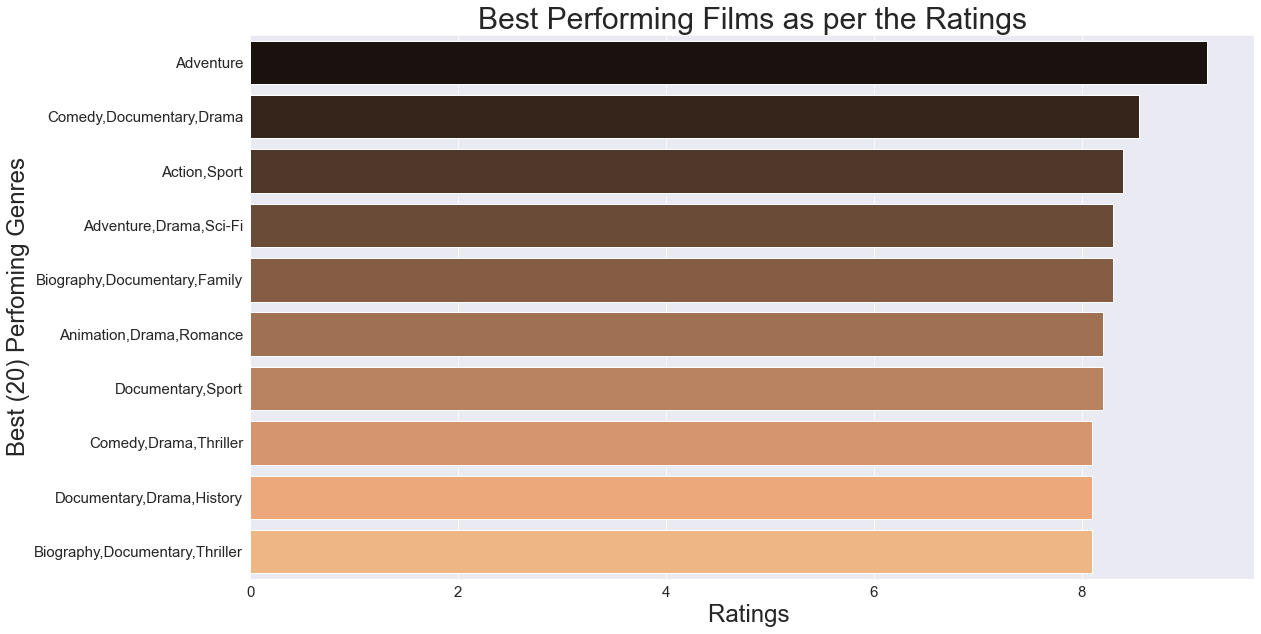

In [164]:
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y = 'genres', x = 'averagerating',data= grouping_5 ,palette='copper',orient='h')

ax.set_title('Best Performing Films as per the Ratings',fontsize= 30)
ax.set_ylabel('Best (20) Perfoming Genres',fontsize= 24)
ax.set_xlabel('Ratings ',fontsize= 24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
bar.savefig("Genres_VS_Ratings.png")



In [46]:
"""
Analysis of the top 20 performing genres in relation to their ratings
"""

'\nAnalysis of the top 20 performing genres in relation to their ratings\n'

In [82]:
grouping_6 = class_grouped_means(budget_Title_Ratings_df,['numvotes'],'genres')
grouping_7 = grouping_6.sort_values(by=['numvotes'], ascending=False).head(10)
grouping_7.head()

,genres,numvotes
106,"Adventure,Drama,Sci-Fi",989725.00
117,"Adventure,Mystery,Sci-Fi",538720.00
314,"Mystery,Sci-Fi,Thriller",449511.25
11,"Action,Adventure,Sci-Fi",412887.20
10,"Action,Adventure,Mystery",399703.00


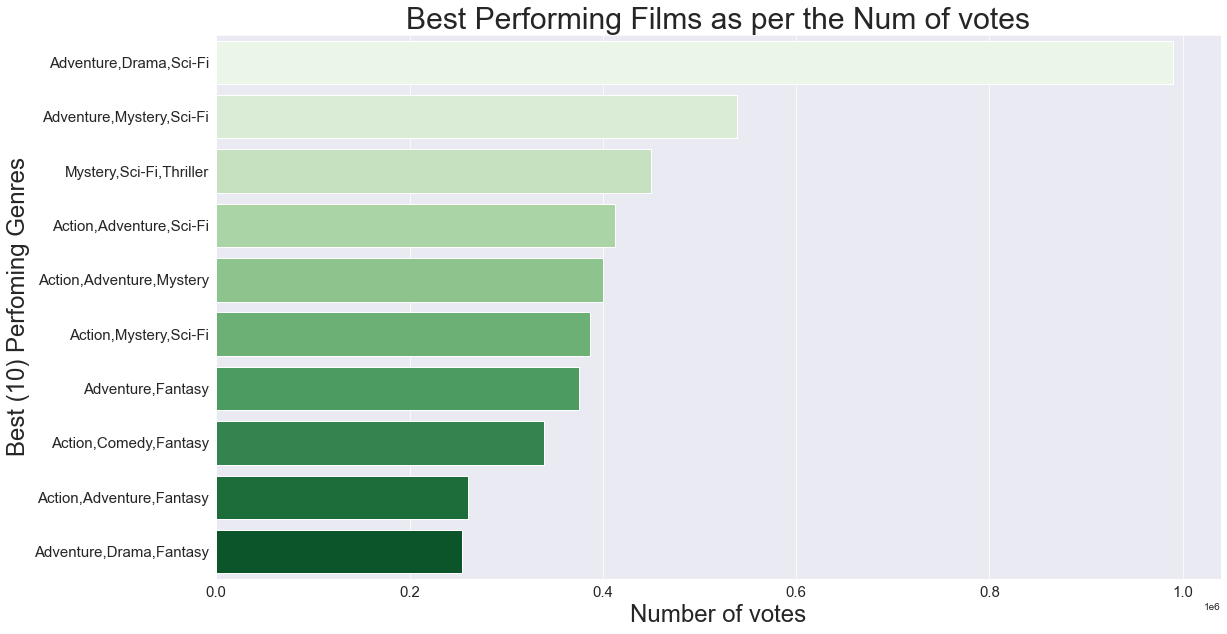

In [165]:
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y = 'genres', x = 'numvotes',data= grouping_7 ,palette='Greens')

ax.set_title('Best Performing Films as per the Num of votes',fontsize= 30)
ax.set_ylabel('Best (10) Perfoming Genres',fontsize= 24)
ax.set_xlabel('Number of votes',fontsize= 24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
bar.savefig("Genres_VS_NumVotes.png")



### Question 3: What is the relationship between genres and foreign and domestic gross income?

#### I. Domestic gross vs genres

In [105]:
grouping_8 = class_grouped_means(budget_Title_Ratings_df,['domestic_gross'],'genres')
grouping_9 = grouping_8.sort_values(by=['domestic_gross'], ascending=False).head(10)
grouping_9.head()

,genres,domestic_gross
107,"Adventure,Drama,Sport",4.007000e+08
237,"Documentary,Drama,Sport",3.096625e+08
319,Sci-Fi,3.094695e+08
298,"Fantasy,Romance",3.006108e+08
11,"Action,Adventure,Sci-Fi",2.250140e+08


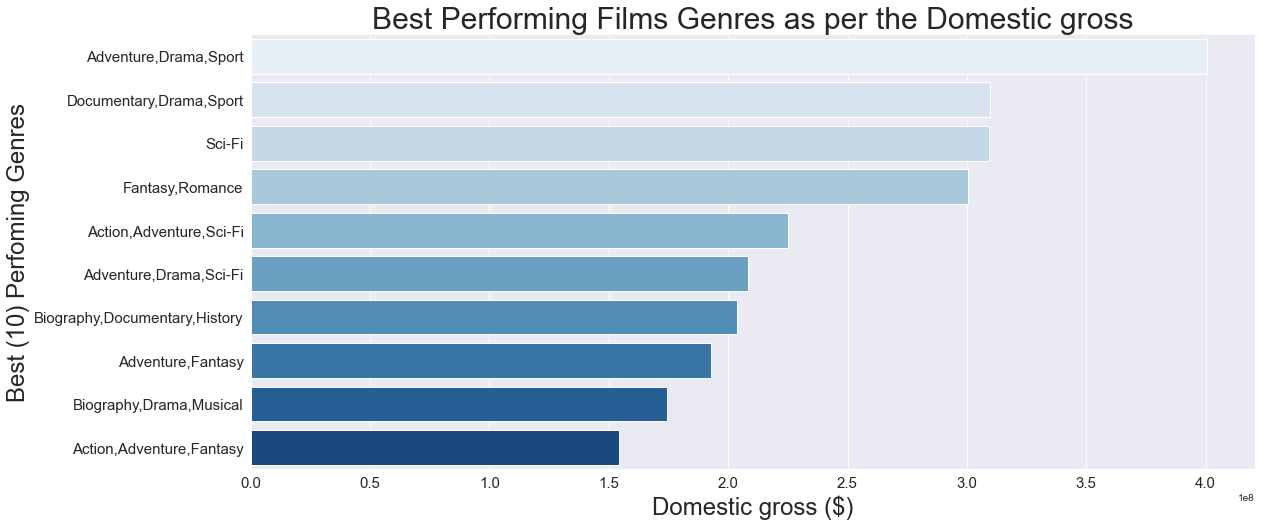

In [166]:
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(y = 'genres', x = 'domestic_gross',data= grouping_9 ,palette='Blues')

ax.set_title('Best Performing Films Genres as per the Domestic gross',fontsize= 30)
ax.set_ylabel('Best (10) Perfoming Genres',fontsize= 24)
ax.set_xlabel('Domestic gross ($)',fontsize= 24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
bar.savefig("Genres_VS_Domestic_gross.png")



#### II. Foreign gross vs genres

In [108]:
grouping_10 = class_grouped_means(budget_Title_Ratings_df,['foreign_gross'],'genres')
grouping_11 = grouping_10.sort_values(by=['foreign_gross'], ascending=False).head(10)
grouping_11.head()

,genres,foreign_gross
107,"Adventure,Drama,Sport",8.757000e+08
298,"Fantasy,Romance",6.671000e+08
30,"Action,Comedy,Mystery",5.421000e+08
113,"Adventure,Fantasy",5.111333e+08
106,"Adventure,Drama,Sci-Fi",4.455500e+08


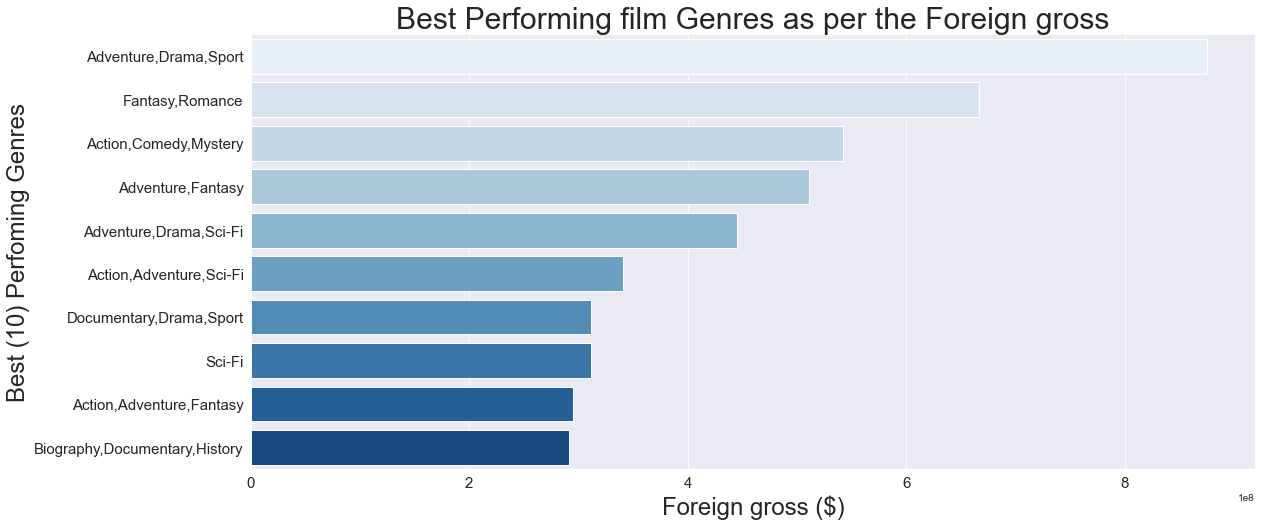

In [167]:
sns.set_style('darkgrid')

bar , ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(y = 'genres', x = 'foreign_gross',data= grouping_11 ,palette='Blues')

ax.set_title('Best Performing film Genres as per the Foreign gross',fontsize= 30)
ax.set_ylabel('Best (10) Perfoming Genres',fontsize= 24)
ax.set_xlabel('Foreign gross ($)',fontsize= 24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
bar.savefig("Genres_VS_foreign_gross.png")



### Question 4: What is the relationship between Worldwide gross income and Ratings

In [144]:
pearsoncorr = budget_Title_Ratings_df.corr(method='pearson')
pearsoncorr

,domestic_gross,foreign_gross,year,WorldWide_gross,start_year,runtime_minutes,averagerating,numvotes
domestic_gross,1.000000,0.827361,0.019562,0.931879,0.010741,0.031041,0.084792,0.576577
foreign_gross,0.827361,1.000000,0.035828,0.974757,0.021938,0.073021,0.092841,0.526612
year,0.019562,0.035828,1.000000,0.030916,0.590595,-0.012189,0.035344,-0.110852
WorldWide_gross,0.931879,0.974757,0.030916,1.000000,0.018439,0.059501,0.093669,0.569319
start_year,0.010741,0.021938,0.590595,0.018439,1.000000,0.065706,-0.034755,-0.076697
runtime_minutes,0.031041,0.073021,-0.012189,0.059501,0.065706,1.000000,0.131443,0.255784
averagerating,0.084792,0.092841,0.035344,0.093669,-0.034755,0.131443,1.000000,0.242963
numvotes,0.576577,0.526612,-0.110852,0.569319,-0.076697,0.255784,0.242963,1.000000


In [146]:
"""
There is weak positive correlation between WorldWide gross and average rating of 0.059501	
"""

'\nThere is slight or weak correlation between WorldWide gross and average rating of 0.059501\t\n'

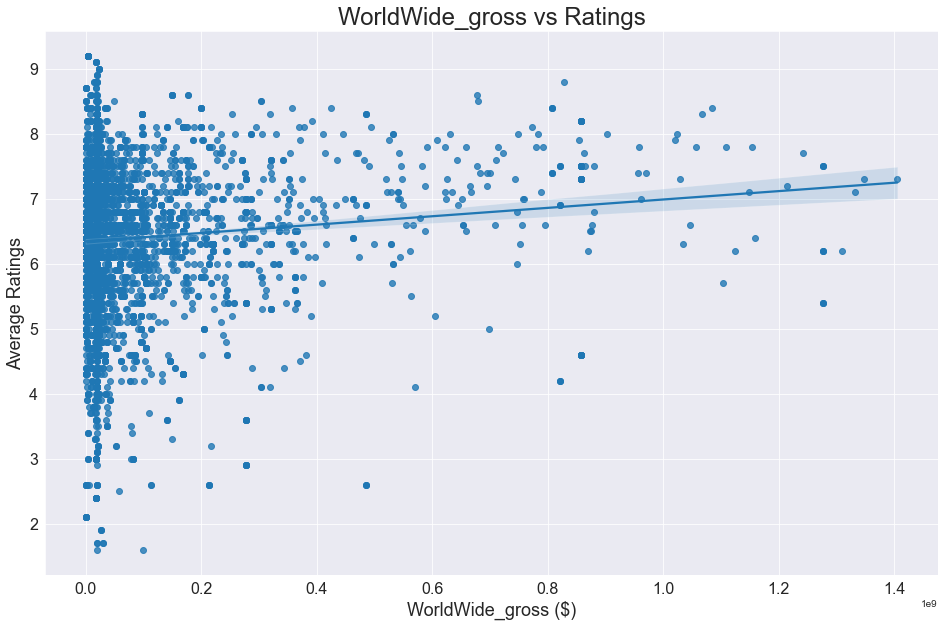

In [174]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.regplot(
    x=budget_Title_Ratings_df["WorldWide_gross"],
    y=budget_Title_Ratings_df["averagerating"],
    
)

ax.set_xlabel("WorldWide_gross ($)",fontsize=18)
ax.set_ylabel("Average Ratings",fontsize=18)
ax.set_title("WorldWide_gross vs Ratings",fontsize=24);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("Scatter_WorldWide_gross_VS_Ratings.png")

In [175]:
"""
This shows a weak positive correlation as the average rating increases the WorldWide gross may increase or it may not increase and the trend line is slightly positive
"""

'\nThis shows a weak positive correlation as the average rating increases the WorldWide gross may increase or it may not increase and the trend line is slightly positive\n'

### Question 4: What is the relationship between number of votes and the average rating

In [134]:
pearsoncorr_2 = budget_Title_Ratings_df.corr(method='pearson')
pearsoncorr_2

,domestic_gross,foreign_gross,year,WorldWide_gross,start_year,runtime_minutes,averagerating,numvotes
domestic_gross,1.000000,0.827361,0.019562,0.931879,0.010741,0.031041,0.084792,0.576577
foreign_gross,0.827361,1.000000,0.035828,0.974757,0.021938,0.073021,0.092841,0.526612
year,0.019562,0.035828,1.000000,0.030916,0.590595,-0.012189,0.035344,-0.110852
WorldWide_gross,0.931879,0.974757,0.030916,1.000000,0.018439,0.059501,0.093669,0.569319
start_year,0.010741,0.021938,0.590595,0.018439,1.000000,0.065706,-0.034755,-0.076697
runtime_minutes,0.031041,0.073021,-0.012189,0.059501,0.065706,1.000000,0.131443,0.255784
averagerating,0.084792,0.092841,0.035344,0.093669,-0.034755,0.131443,1.000000,0.242963
numvotes,0.576577,0.526612,-0.110852,0.569319,-0.076697,0.255784,0.242963,1.000000


In [147]:
"""
There is a weak positive correlation between the num of votes and the average rating of the movies of 0.242963
"""

'\nThere is a weak positive correlation between the num of votes and the average rating of the movies of 0.242963\n'

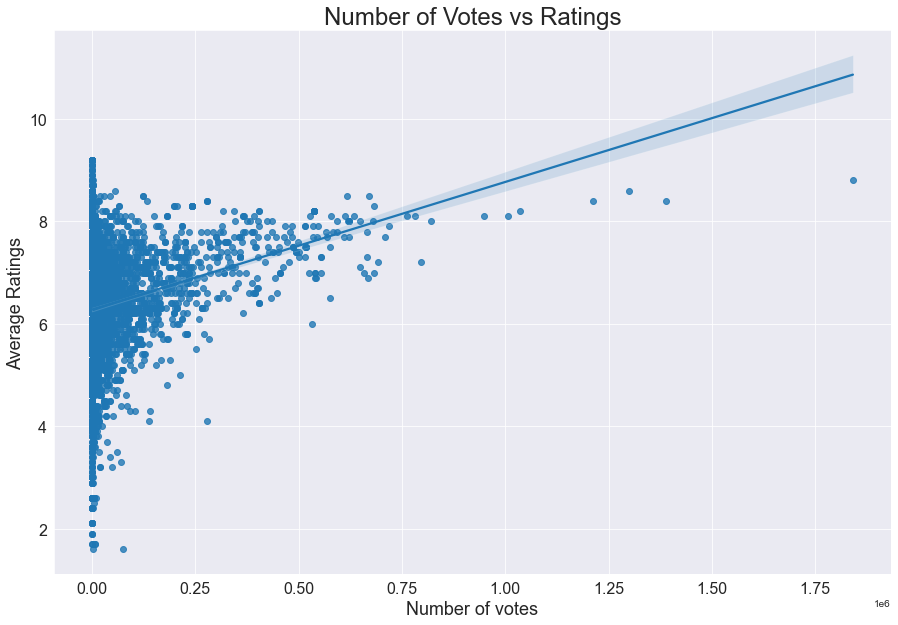

In [176]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.regplot(
    x=budget_Title_Ratings_df["numvotes"],
    y=budget_Title_Ratings_df["averagerating"],
    
)

ax.set_xlabel("Number of votes",fontsize=18)
ax.set_ylabel("Average Ratings",fontsize=18)
ax.set_title("Number of Votes vs Ratings",fontsize=24);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("Scatter_NumVotes_VS_Ratings.png")

In [132]:
"""
There is a positive correlation between Number of votes and the average ratings of the movie and the trend line is positive
"""

'\nThere is a positive correlation between Number of votes and the average ratings of the movie and the trend line is positive\n'

### Question 5: What is the relationship between the number of votes and the WorldWide gross?

In [153]:
pearsoncorr_3 = budget_Title_Ratings_df.corr(method='pearson')
pearsoncorr_3

,domestic_gross,foreign_gross,year,WorldWide_gross,start_year,runtime_minutes,averagerating,numvotes
domestic_gross,1.000000,0.827361,0.019562,0.931879,0.010741,0.031041,0.084792,0.576577
foreign_gross,0.827361,1.000000,0.035828,0.974757,0.021938,0.073021,0.092841,0.526612
year,0.019562,0.035828,1.000000,0.030916,0.590595,-0.012189,0.035344,-0.110852
WorldWide_gross,0.931879,0.974757,0.030916,1.000000,0.018439,0.059501,0.093669,0.569319
start_year,0.010741,0.021938,0.590595,0.018439,1.000000,0.065706,-0.034755,-0.076697
runtime_minutes,0.031041,0.073021,-0.012189,0.059501,0.065706,1.000000,0.131443,0.255784
averagerating,0.084792,0.092841,0.035344,0.093669,-0.034755,0.131443,1.000000,0.242963
numvotes,0.576577,0.526612,-0.110852,0.569319,-0.076697,0.255784,0.242963,1.000000


In [154]:
"""
There is a positive correlation between the number of votes and the Worldwide gross of 0.569319
"""

'\nThere is a positive correlation between the number of votes and the Worldwide gross of 0.569319\n'

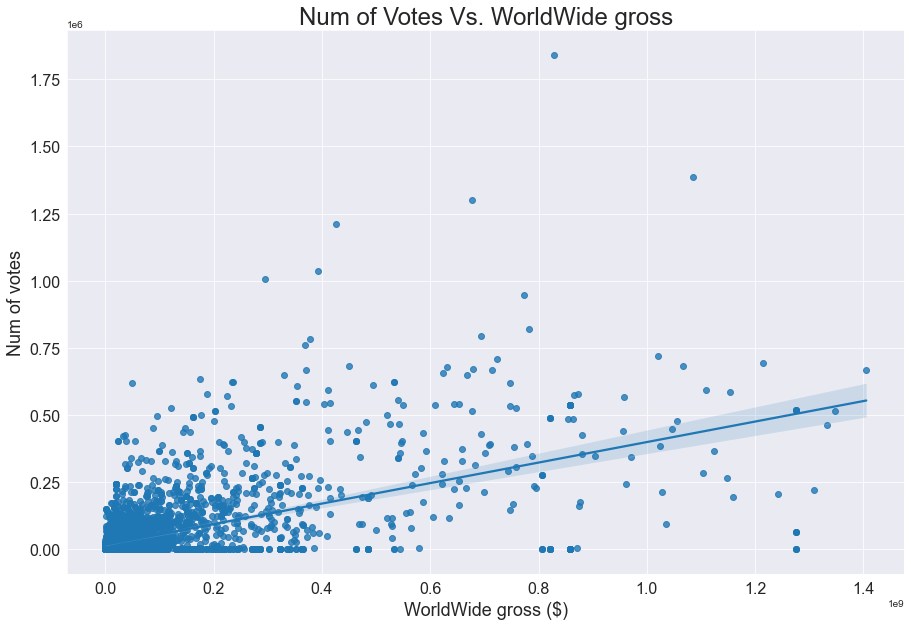

In [177]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.regplot(
    x=budget_Title_Ratings_df["WorldWide_gross"],
    y=budget_Title_Ratings_df["numvotes"],
    
)

ax.set_xlabel("WorldWide gross ($)",fontsize=18)
ax.set_ylabel("Num of votes",fontsize=18)
ax.set_title("Num of Votes Vs. WorldWide gross",fontsize=24);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("Scatter_NumVotes_VS_WorldWide_gross.png")

In [152]:
"""
There is a positive correlation between the num of votes and the WorldWide gross as the trend line is positive
"""

'\nThere is a positive correlation between the num of votes and the WorldWide gross as the trend line is positive\n'

## Summary

While there are many other factors that we could consider in a future analysis we feel that the following conclusions will result in a successful business venture as Microsoft enters the movie industry.